## TASK 7 - Basic Statistics and Probability II
### Statistical Analysis and Probability Distributions with the Iris Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets import load_iris

# Load the Iris dataset into a DataFrame
iris_data = load_iris(as_frame=True)
iris = iris_data.frame
iris.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### Descriptive Statistics
Central Tendencies: Mean, Median, Mode of Sepal Length

In [2]:
mean_sl = iris["sepal_length"].mean()
median_sl = iris["sepal_length"].median()
mode_sl = iris["sepal_length"].mode()[0]

print("Mean Sepal Length:", mean_sl)
print("Median Sepal Length:", median_sl)
print("Mode Sepal Length:", mode_sl)


Mean Sepal Length: 5.843333333333334
Median Sepal Length: 5.8
Mode Sepal Length: 5.0


#### Dispersion Measures: Variance & Standard Deviation of Petal Width

In [3]:
var_pw = iris["petal_width"].var()
std_pw = iris["petal_width"].std()

print("Variance of Petal Width:", var_pw)
print("Standard Deviation of Petal Width:", std_pw)


Variance of Petal Width: 0.5810062639821029
Standard Deviation of Petal Width: 0.7622376689603465


#### Summary Statistics for All Numerical Features

In [4]:
summary_stats = iris.drop(columns="species").agg(["mean", "median", "var", "std"])
summary_stats


,sepal_length,sepal_width,petal_length,petal_width
mean,5.843333,3.057333,3.758000,1.199333
median,5.800000,3.000000,4.350000,1.300000
var,0.685694,0.189979,3.116278,0.581006
std,0.828066,0.435866,1.765298,0.762238


#### Probability & Distributions

In [5]:
# Relative frequency distribution
prob_dist = iris["sepal_length"].value_counts(normalize=True).sort_index()
prob_dist


sepal_length
4.3    0.006667
4.4    0.020000
4.5    0.006667
4.6    0.026667
4.7    0.013333
4.8    0.033333
4.9    0.040000
5.0    0.066667
5.1    0.060000
5.2    0.026667
5.3    0.006667
5.4    0.040000
5.5    0.046667
5.6    0.040000
5.7    0.053333
5.8    0.046667
5.9    0.020000
6.0    0.040000
6.1    0.040000
6.2    0.026667
6.3    0.060000
6.4    0.046667
6.5    0.033333
6.6    0.013333
6.7    0.053333
6.8    0.020000
6.9    0.026667
7.0    0.006667
7.1    0.006667
7.2    0.020000
7.3    0.006667
7.4    0.006667
7.6    0.006667
7.7    0.026667
7.9    0.006667
Name: proportion, dtype: float64

#### Histogram of Sepal Length

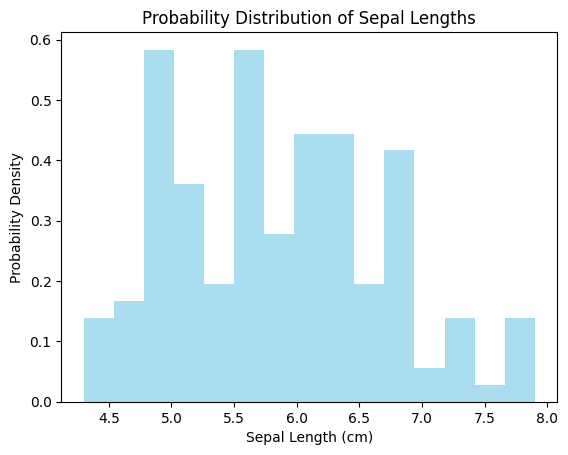

In [6]:
plt.hist(iris["sepal_length"], bins=15, density=True, alpha=0.7, color="skyblue")
plt.title("Probability Distribution of Sepal Lengths")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Probability Density")
plt.show()


#### Cumulative Distribution Function (CDF) for Petal Length

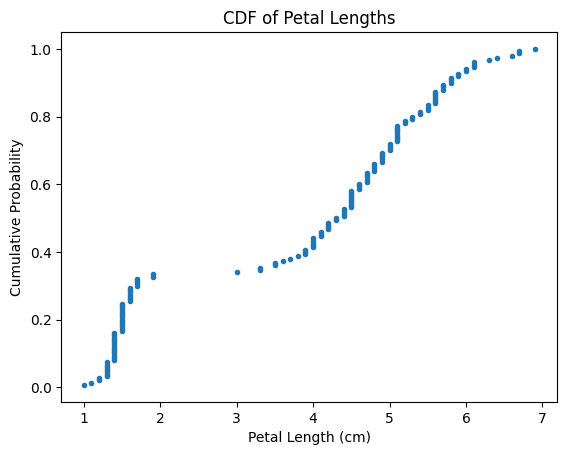

In [7]:
x = np.sort(iris["petal_length"])
y = np.arange(1, len(x)+1) / len(x)

plt.plot(x, y, marker=".", linestyle="none")
plt.title("CDF of Petal Lengths")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Cumulative Probability")
plt.show()


#### Probability Density Function (PDF) for Sepal Width

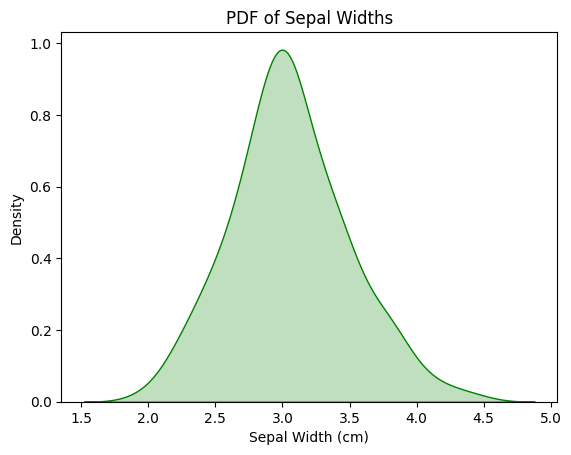

In [8]:
sns.kdeplot(iris["sepal_width"], fill=True, color="green")
plt.title("PDF of Sepal Widths")
plt.xlabel("Sepal Width (cm)")
plt.ylabel("Density")
plt.show()


#### Probability Estimation: Petal Length > 4.5 cm

In [9]:
prob_over_45 = np.mean(iris["petal_length"] > 4.5)
print("P(Petal Length > 4.5 cm):", prob_over_45)


P(Petal Length > 4.5 cm): 0.42


#### Inferential Statistics

In [10]:
setosa = iris[iris["species"] == "setosa"]["petal_length"]
versicolor = iris[iris["species"] == "versicolor"]["petal_length"]

t_stat, p_val = stats.ttest_ind(setosa, versicolor)
print("t-statistic:", t_stat)
print("p-value:", p_val)


t-statistic: nan
p-value: nan


C:\Users\rameez computer\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\_lib\deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


#### Covariance & Correlation Between Sepal Length and Sepal Width

In [11]:
cov = iris["sepal_length"].cov(iris["sepal_width"])
corr = iris["sepal_length"].corr(iris["sepal_width"])

print("Covariance:", cov)
print("Correlation:", corr)


Covariance: -0.042434004474272945
Correlation: -0.1175697841330021
